In [22]:
import numpy as np
import astropy.units as u
from astropy.io import fits
from matplotlib.colors import LogNorm
from matplotlib.patches import Rectangle, Circle
from pathlib import Path
from IPython.display import clear_output
from importlib import reload

import poppy
import logging, sys
poppy_log = logging.getLogger('poppy')
poppy_log.setLevel('DEBUG')
logging.basicConfig(stream=sys.stdout, level=logging.INFO)
poppy_log.disabled = True

import warnings
warnings.filterwarnings("ignore")

import apra_pop_models
from apra_pop_models.math_module import xp, _scipy, ensure_np_array
import apra_pop_models.fresnel_coro_2dm_34 as fresnel
import apra_pop_models.rmad_2dm as rmad
import apra_pop_models.utils as utils
import apra_pop_models.props as props
from apra_pop_models.imshows import imshow1, imshow2, imshow3

import lina
import lina.adefc as adefc
from scipy.optimize import minimize


/home/kianmilani/Projects/apra-howfsc-models/apra_pop_models


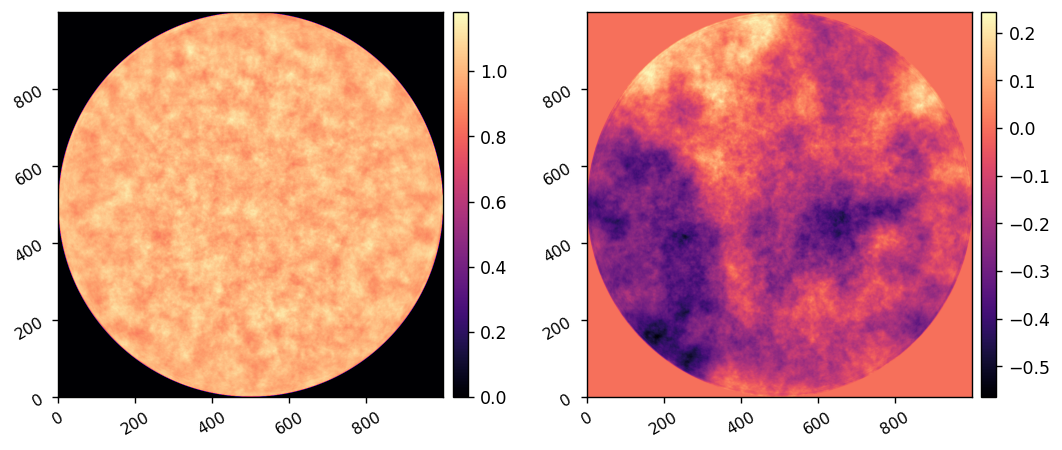

In [23]:
reload(fresnel)
I = fresnel.CORO()
I.use_opds = True

WFE = I.calc_pupil()
imshow2(xp.abs(WFE), xp.angle(WFE))

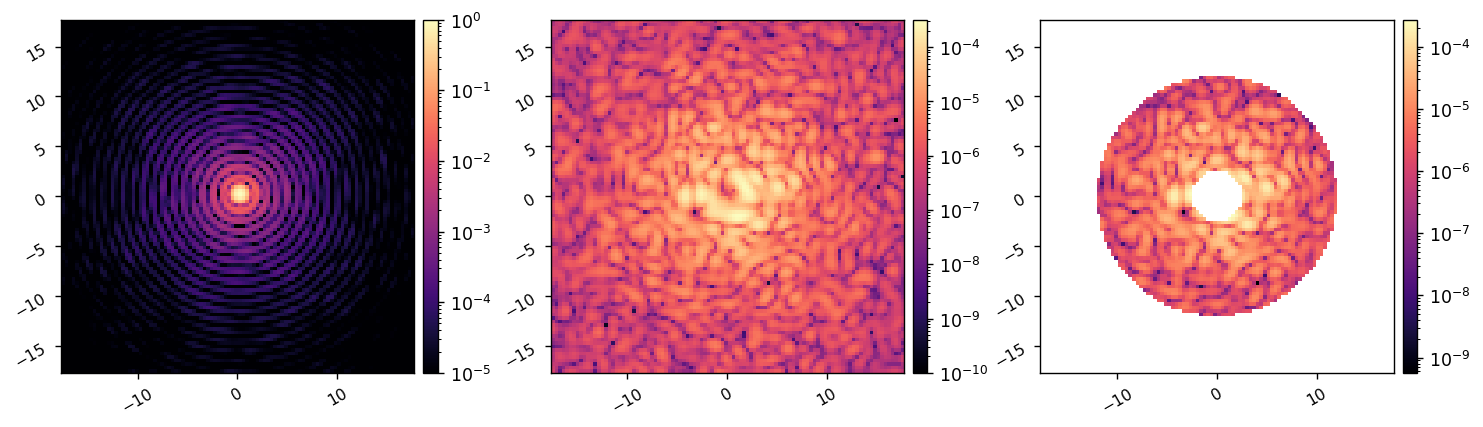

In [24]:
reload(rmad)
I = rmad.MODEL()
I.WFE = WFE

iwa = 2.5
owa = 12
rot = 0
control_mask = lina.utils.create_annular_focal_plane_mask(I.npsf, I.psf_pixelscale_lamD, irad=iwa, orad=owa, edge=None, rotation=rot)

I.use_vortex = False
ref_psf = I.snap()
I.Imax_ref = xp.max(ref_psf)
ref_psf /= I.Imax_ref
I.use_vortex = True
ref_coro_im = I.snap()

imshow3(ref_psf, ref_coro_im, ref_coro_im * control_mask, 
        pxscl=I.psf_pixelscale_lamD, lognorm=True, vmin1=1e-5, vmin2=1e-10)


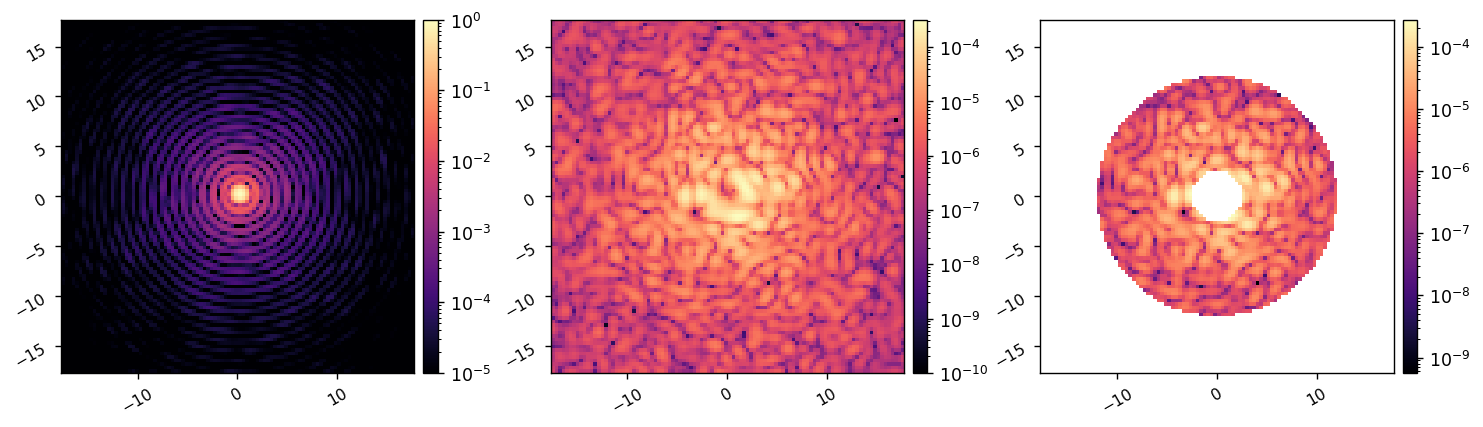

In [25]:
reload(rmad)
reload(props)
M = rmad.MODEL()
M.WFE = WFE

M.use_vortex = False
model_psf = M.snap()
M.Imax_ref = xp.max(model_psf)
model_psf /= M.Imax_ref
M.use_vortex = True
model_coro_im = M.snap()

imshow3(model_psf, model_coro_im, model_coro_im * control_mask,
        pxscl=M.psf_pixelscale_lamD, lognorm=True, vmin1=1e-5, vmin2=1e-10)


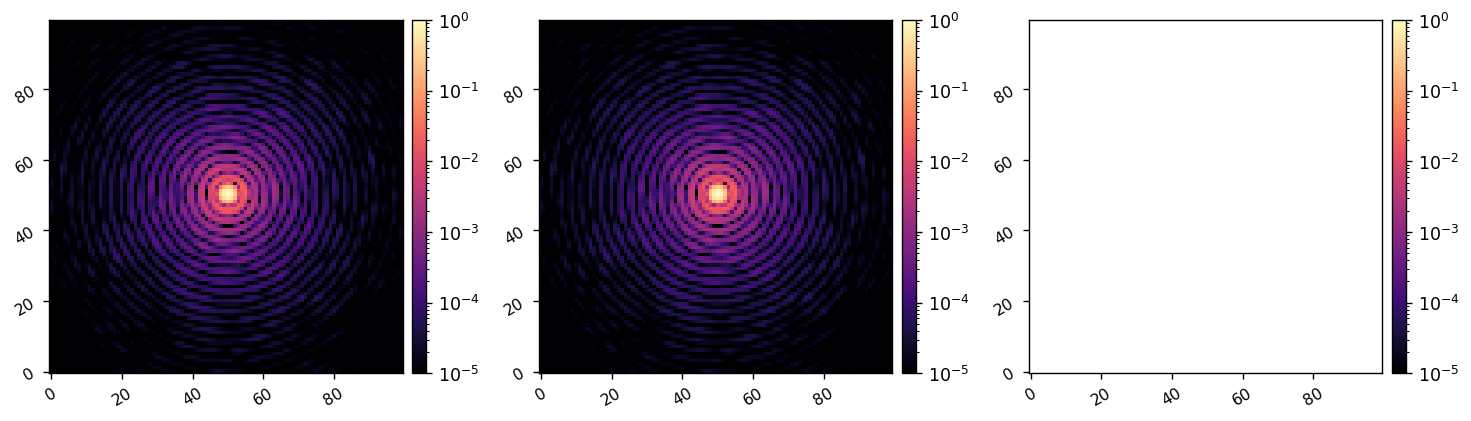

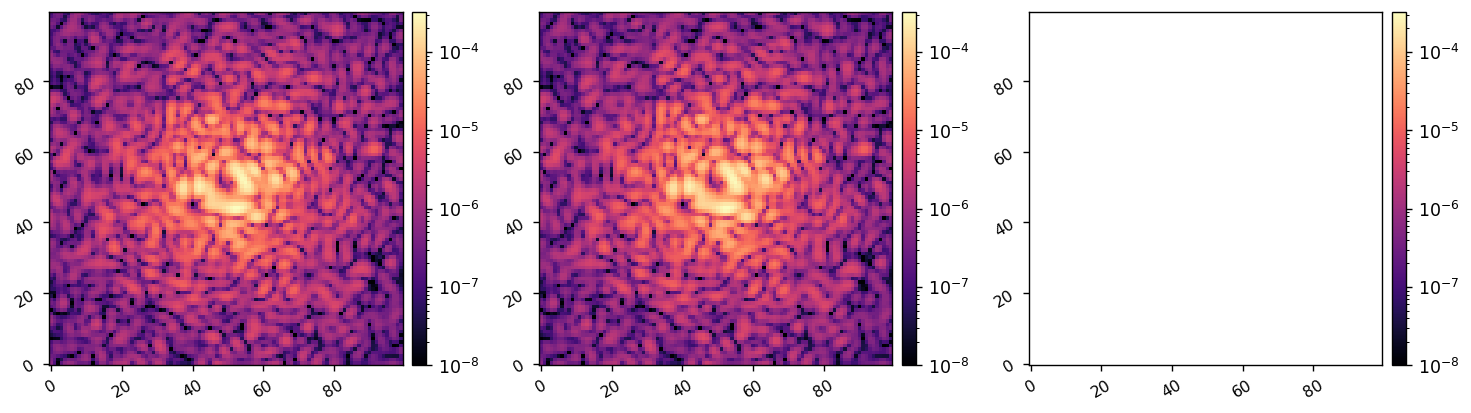

In [26]:
imshow3(ref_psf, model_psf, xp.abs(ref_psf - model_psf), 
        lognorm1=True, lognorm2=True, lognorm3=True, vmax3=1, 
        vmin1=1e-5, vmin2=1e-5, vmin3=1e-5)

imshow3(ref_coro_im, model_coro_im, xp.abs(ref_coro_im - model_coro_im), 
        lognorm1=True, lognorm2=True, lognorm3=True, vmax3=xp.max(ref_coro_im), 
        vmin1=1e-8, vmin2=1e-8, vmin3=1e-8)

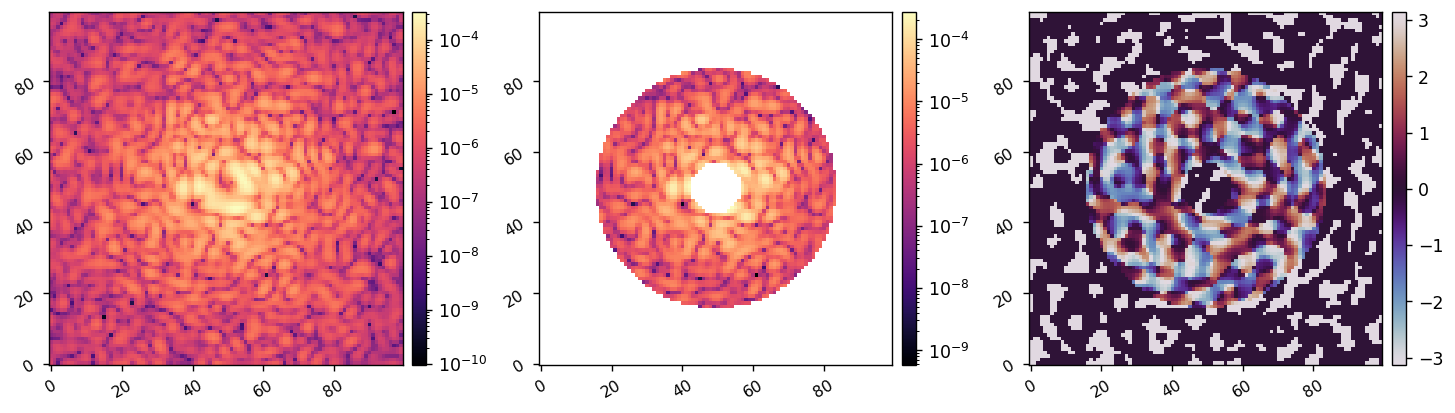

	Cost-function J_delE: 0.038
	Cost-function J_c: 0.000
	Cost-function normalization factor: 0.038
	Total cost-function value: 1.000

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         1904     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.00000D+00    |proj g|=  3.53742D+06
	Cost-function J_delE: 0.001
	Cost-function J_c: 2366863905.325
	Cost-function normalization factor: 0.038
	Total cost-function value: 62065334530.855



 This problem is unconstrained.


	Cost-function J_delE: 0.004
	Cost-function J_c: 22.996
	Cost-function normalization factor: 0.038
	Total cost-function value: 603.136

	Cost-function J_delE: 0.144
	Cost-function J_c: 1.453
	Cost-function normalization factor: 0.038
	Total cost-function value: 41.859

	Cost-function J_delE: 1.938
	Cost-function J_c: 0.129
	Cost-function normalization factor: 0.038
	Total cost-function value: 54.202

	Cost-function J_delE: 1.116
	Cost-function J_c: 0.008
	Cost-function normalization factor: 0.038
	Total cost-function value: 29.472

	Cost-function J_delE: 0.045
	Cost-function J_c: 0.000
	Cost-function normalization factor: 0.038
	Total cost-function value: 1.195

	Cost-function J_delE: 0.037
	Cost-function J_c: 0.000
	Cost-function normalization factor: 0.038
	Total cost-function value: 0.964

	Cost-function J_delE: 0.040
	Cost-function J_c: 0.000
	Cost-function normalization factor: 0.038
	Total cost-function value: 1.051

	Cost-function J_delE: 0.037
	Cost-function J_c: 0.000
	Cost-fu


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


	Cost-function J_delE: 0.001
	Cost-function J_c: 2866318532184801873494016.000
	Cost-function normalization factor: 0.038
	Total cost-function value: 75162335346649159402782720.000

	Cost-function J_delE: 0.004
	Cost-function J_c: 21.798
	Cost-function normalization factor: 0.038
	Total cost-function value: 571.689

	Cost-function J_delE: 0.161
	Cost-function J_c: 1.373
	Cost-function normalization factor: 0.038
	Total cost-function value: 40.221

	Cost-function J_delE: 2.094
	Cost-function J_c: 0.112
	Cost-function normalization factor: 0.038
	Total cost-function value: 57.852

	Cost-function J_delE: 0.613
	Cost-function J_c: 0.004
	Cost-function normalization factor: 0.038
	Total cost-function value: 16.185

	Cost-function J_delE: 0.051
	Cost-function J_c: 0.000
	Cost-function normalization factor: 0.038
	Total cost-function value: 1.337

	Cost-function J_delE: 0.038
	Cost-function J_c: 0.000
	Cost-function normalization factor: 0.038
	Total cost-function value: 1.006

	Cost-function


 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


In [27]:
acts = xp.zeros(M.Nacts)
# acts = fits.getdata('example-data/ad_test_acts.fits')

I.set_dm1(rmad.acts_to_command(acts[:M.Nacts//2], M.dm_mask))
I.set_dm2(rmad.acts_to_command(acts[M.Nacts//2:], M.dm_mask))
coro_im = I.snap()
E_ab = I.calc_wf() * control_mask
imshow3(coro_im, xp.abs(E_ab)**2, xp.angle(E_ab), lognorm1=True, lognorm2=True, cmap3='twilight')

r_cond = 1e-3
bfgs_tol = 1e-3
bfgs_opts = {
    'disp':True,
    # 'maxls':50,
    # 'ftol':1e-6,
    # 'gtol':1e-6,
}

del_acts0 = np.zeros(M.Nacts)
res = minimize(rmad.val_and_grad, 
                jac=True, 
                x0=del_acts0,
                args=(M, acts, E_ab, r_cond, control_mask, True, False), 
                method='L-BFGS-B',
                tol=bfgs_tol,
                options=bfgs_opts,
                )

1.1021687350804017e-05 1.4321021375443486e-05


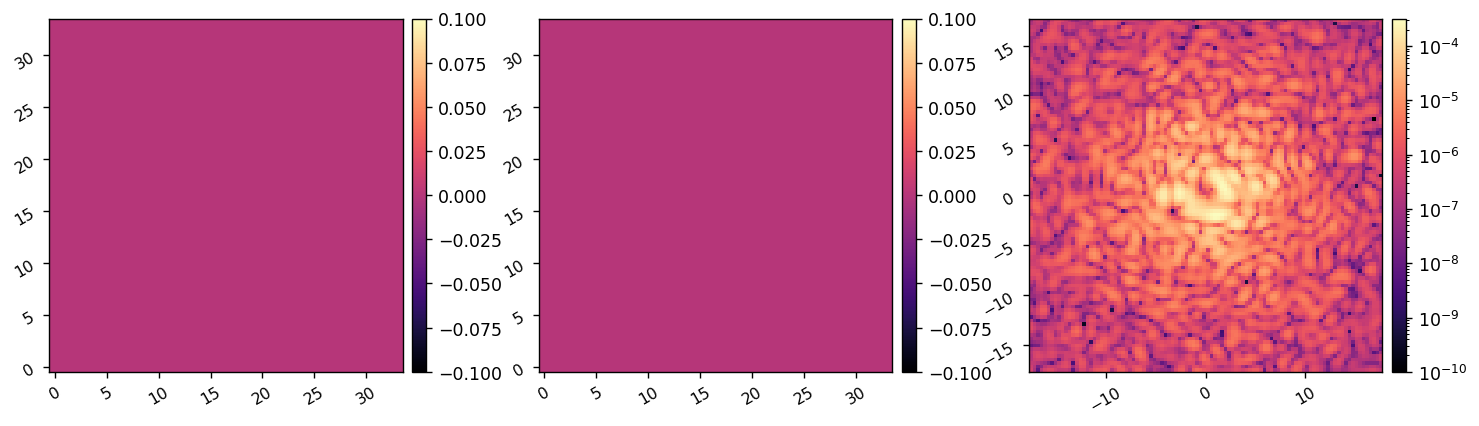

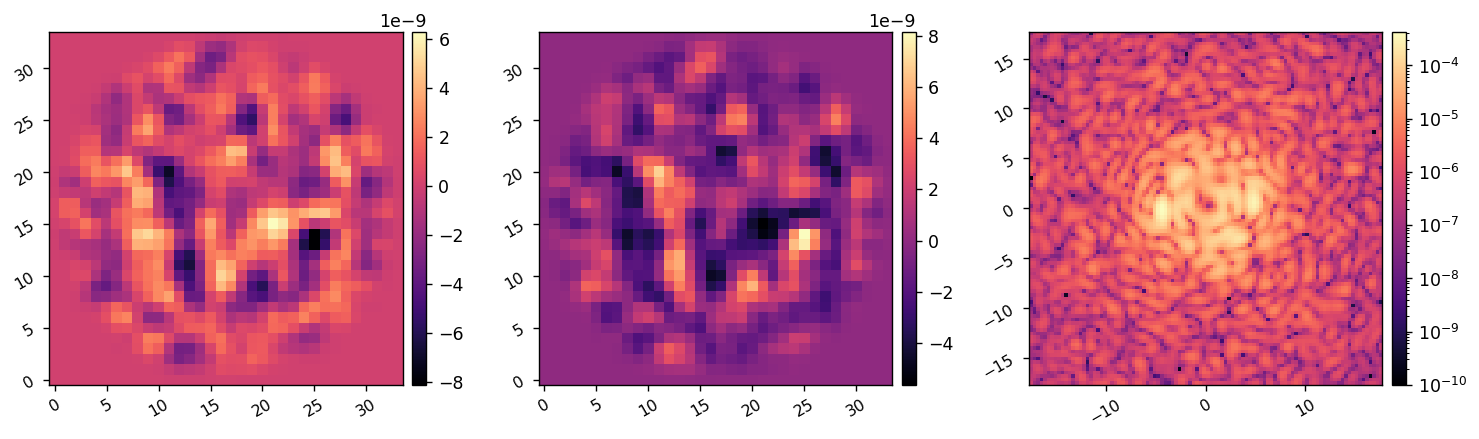

In [21]:
old_dm1 = rmad.acts_to_command(acts[:M.Nacts//2], I.dm_mask)
old_dm2 = rmad.acts_to_command(acts[M.Nacts//2:], I.dm_mask)
del_dm1 = rmad.acts_to_command(res.x[:M.Nacts//2], I.dm_mask)
del_dm2 = rmad.acts_to_command(res.x[M.Nacts//2:], I.dm_mask)

I.set_dm1(old_dm1 + del_dm1)
I.set_dm2(old_dm2 + del_dm2)
new_im = I.snap()

print(xp.mean(old_im[control_mask]), xp.mean(new_im[control_mask]))
imshow3(old_dm1, old_dm2, old_im, lognorm3=True, pxscl3=I.psf_pixelscale_lamD, vmin3=1e-10,)
imshow3(del_dm1, del_dm2, new_im, lognorm3=True, pxscl3=I.psf_pixelscale_lamD, vmin3=1e-10,)


In [ ]:
I.zero_dm()
all_ims = []
all_efs = []
all_commands = []

In [ ]:
reload(rmad)
reload(adefc)

r_cond = 1e-2
r_cond = 1e-3
# r_cond = 1e-4
# r_cond = 1e-5
# r_cond = 1e-6

bfgs_tol = 1e-2
bfgs_tol = 1e-3
bfgs_tol = 1e-4
# bfgs_tol = 1e-5

bfgs_opts = {
    'disp':False,
    # 'ftol':1e-6,
    # 'gtol':1e-6,
}

all_ims, all_efs, all_commands = adefc.run(I, M, 
                                            rmad.val_and_grad, control_mask, 
                                            Nitr=3, 
                                            reg_cond=r_cond,
                                            bfgs_tol=bfgs_tol,
                                            bfgs_opts=bfgs_opts,
                                            gain=1,
                                            all_ims=all_ims,
                                            all_efs=all_efs,
                                            all_commands=all_commands,
                                            )